# USING THE ELBOW METHOD TO FIND THE OPTIMAL NUMBER OF CLUSTERS FOR K-MEANS CLUSTERING

K-means clustering is an unsupervised machine learning technique used to cluster similar groups of data points. It is also known as Lloyd's algorithm. The process is as follows:
1. Initialisation: Generate K randomly-placed centroids (also known as cluster-centers, or means)
2. Assignment: Assign each data point to the centroid to which it has the smallest euclidean distance
3. Update: Update the centroids to be the mean of each cluster
4. Repeat steps 1-3 until convergence

We will be using packages from numpy, scikit-learn, and matplotlib:

In [166]:
#We use a numpy array for the k-means clustering, but we will be printing sections of the data using Pandas dataframes,
#as the display format is much cleaner and more intuitive
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

We create a random two dimensional array with two obvious clusters. We want to be able to use an algorithm to evaluate the optimal number of clusters for k-means clustering. If this algorithm is successful, it should return 2 as the optimal k.

In [125]:
data = []
#We create 2 clusters in the bottom-left and top-right corners respectively:
for x in range(25):
    data.append([np.random.randint(0,40), np.random.randint(0,40)])
for x in range(25):
    data.append([np.random.randint(60,100), np.random.randint(60,100)])
#We use numpy to turn the list of lists into a two-dimensional array:
data = np.array(data)
pd.DataFrame(data).shape

(50, 2)

As we can see, the data has 50 rows of two columns, consistent with us adding 50 pieces of data each with two values

In [177]:
pd.DataFrame(data,columns=['Variable 1','Variable 2']).head(5)

,Variable 1,Variable 2
0,17,29
1,25,15
2,12,3
3,14,24
4,23,28


###### A slice of the data: each row is a data point

We then run a for loop to create 9 different k-means models of our data, with the number of cluster (k) ranging from 1 to 9. We also create a list of each model's inertia.For Scikit-Learn, inertia is calculated as the sum of squared distance for each point to it's closest centroid, i.e., its assigned cluster.

$$I = \sum_{i}(d(i,cr))$$

Where *cr* is the centroid of the assigned cluster and *d* is the squared distance.

The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum of squared criterion:

$$W_k = \sum_{r=1}^{k}\frac 1 {(2*n_r) }D_r$$

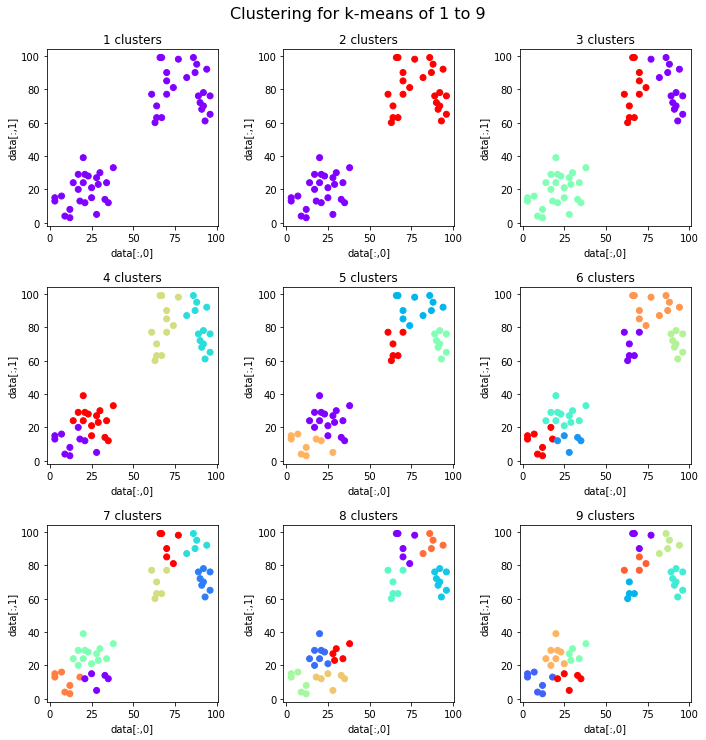

In [139]:
plt.figure(figsize=(12,12))
inertias = []

plt.suptitle('Clustering for k-means of 1 to 9', y=0.93, size=16)

for num_clusters in range(1,10):
    model = KMeans(n_clusters=num_clusters)
    model.fit(data)
    inertias.append(model.inertia_)
    plt.subplot(3,3,num_clusters, aspect='equal')
    plt.scatter(data[:,0],data[:,1], c=model.labels_, cmap='rainbow')
    plt.xlabel('data[:,0]')
    plt.ylabel('data[:,1]')
    plt.title("{} clusters".format(num_clusters))

plt.subplots_adjust(hspace=0.35)
plt.show()

###### (Fig. 1) Representations of the clustering of our data using k-means clustering for models of k=1 to k=9. The first column of our numpy array is plotted on the x-axis, and the second column is plotted on the y-axis.

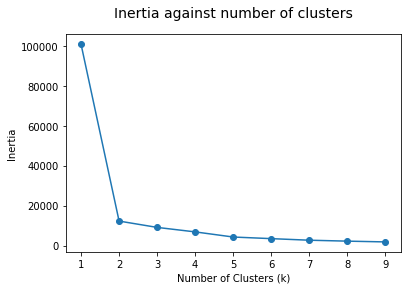

In [140]:
plt.plot(range(1,10), inertias, '-o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Inertia against number of clusters', size=14, y=1.05)
plt.show()

###### (Fig. 2) The inertia of each model with k clusters.

We can see from inspection that the rate of decrease of inertia dramatically lessens after the model with 2 clusters. If we choose too low a k, we will underfit, meaning that we won't be able to detect small trends in data. However, if we choose too high a k, our model is then too sensitive to small variations in the data. Finding the optimal k is a balance between these two. Visually, we can represent this as finding the "elbow" in a graph of the various models' inertia. Although the elbow on this graph is obvious, it is much less obvious for more complex data where the optimal number of clusters is harder to determine. Thus, we can find an algorithm which will calculate the optimal number of clusters given the inertias of each model to assist us with this.

## Finding the elbow in the inertia curve

We can find the "elbow" in the inertia curve by finding the point at which the absolute second derivative is highest. To do this, we will draw a line from the first to the last point of the curve and then find the data point that is farthest away from that line. To visualise the point which is the furthest from this line, we can imagine a line segment extending from each data point to intersect with the line at right angles. The data point for which this line segment is the longest must be the furthest away from the line, and thus must be the elbow in the inertia curve.

In [215]:
# get coordinates of all the points
nPoints = len(inertias)
allCoord = np.vstack((range(nPoints), inertias)).T

- "range(nPoints)" generates an array of numbers from 0 to the number of data points.
- "np.vstack" vertically stacks this array alongside the array of the inertias, forming a new array with as many columns as there are data points, and two rows.
- ".T" finds the transpose of this array - the array is flipped so the rows are now columns, and the columns are now rows, forming an array with 2 columns, and as many rows as there are columns. We call this new array "allCoord". 

In [223]:
display(pd.DataFrame(inertias, columns=['Inertia']))
print("Inertias")
display(pd.DataFrame(np.vstack((range(nPoints), inertias)), index=['Data point','Inertia']))
print("np.vstack((range(nPoints), inertias))")
display(pd.DataFrame(allCoord, columns=['Data point', 'Inertia']))
print("'allCoord': np.vstack((range(nPoints), inertias)).T")

,Inertia
0,100882.900000
1,12239.120000
2,9071.836364
3,6819.873077
4,4246.953914
5,3441.013636
6,2650.729945
7,2184.983333
8,1796.585714


Inertias


,0,1,2,3,4,5,6,7,8
Data point,0.0,1.00,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000
Inertia,100882.9,12239.12,9071.836364,6819.873077,4246.953914,3441.013636,2650.729945,2184.983333,1796.585714


np.vstack((range(nPoints), inertias))


,Data point,Inertia
0,0.0,100882.900000
1,1.0,12239.120000
2,2.0,9071.836364
3,3.0,6819.873077
4,4.0,4246.953914
5,5.0,3441.013636
6,6.0,2650.729945
7,7.0,2184.983333
8,8.0,1796.585714


'allCoord': np.vstack((range(nPoints), inertias)).T


In [184]:
# get vector between first and last point - this is the line
lineVec = allCoord[-1] - allCoord[0]
# normalize the line vector
lineVecNorm = lineVec / np.sqrt(np.sum(lineVec**2))

We find the vector of the line from the first point to the last point by subtracting the coordinate of the first point from the coordinate of the last point. We normalize the line vector which sets the inertia to a value of magnitude 1 (thus a unit vector), and scales the value of the data point column proportionately. This prevents the very large values of inertia from skewering our calculations.

In [212]:
display(pd.DataFrame(lineVec, index=['Data point', 'Inertia']).T)
print("lineVec")
display(pd.DataFrame(lineVecNorm, index=['Data point', 'Inertia']).T)
print("lineVecNorm")

,Data point,Inertia
0,8.0,-105882.065952


lineVec


,Data point,Inertia
0,0.000076,-1.0


lineVecNorm


In [216]:
# pull out first point
firstPoint = allCoord[0]

# vector between all points and first point
vecFromFirst = allCoord - firstPoint

We find the vector from the first point to each of the individual points by subtracting the value of the first point from each element in our array of all the coordinates of the points. This means that the first point has a zero value for inertia.

In [218]:
display(pd.DataFrame(vecFromFirst, columns=['Data point', 'Inertia']))
print("vecFromFirst")

,Data point,Inertia
0,0.0,0.000000
1,1.0,-88643.780000
2,2.0,-91811.063636
3,3.0,-94063.026923
4,4.0,-96635.946086
5,5.0,-97441.886364
6,6.0,-98232.170055
7,7.0,-98697.916667
8,8.0,-99086.314286


vecFromFirst


In [221]:
scalarProduct = np.sum(vecFromFirst * np.matlib.repmat(lineVecNorm, nPoints, 1), axis=1)
vecFromFirstParallel = np.outer(scalarProduct, lineVecNorm)
vecToLine = vecFromFirst - vecFromFirstParallel

To calculate the distance to the line, we split vecFromFirst into two components, one that is parallel to the line and one that is perpendicular. Then, we take the norm of the part that is perpendicular to the line and get the distance. We find the vector parallel to the line by projecting vecFromFirst onto the line. The perpendicular vector is vecFromFirst - vecFromFirstParallel. We project vecFromFirst by taking the scalar product of the vector with the unit vector that points in the direction of the line (this gives us the length of the projection of vecFromFirst onto the line). If we multiply the scalar product by the unit vector, we have vecFromFirstParallel.
- 'np.matlib.repmat(a,m,n)' repeats a given array 0-D to 2-D array or matrix 'a' MxN times. In this case we specify m to be 1, so we produce an array with nPoints number of rows, each containing the lineVecNorm array repeated once.
- 'np.sum()' sums array elements over a given axis. In this case we specify axis=1, so we sum all elements of the first dimension, ie. array[0,:] + array[1,:] + ... This essentially performs a summation of each row of the target array.
- 'np.outer()' computes the outer product of two vectors. Given two vectors a = [a0, a1, ..., aM], and b = [b0, b1, ..., bN], the outer product is [[a0xb0  a0xb1 ... a0xbN][a1xb0  a1xb1 ... a1xbN]...]
- The vector from the first data point to the nth data point (vecFromFirst), the vector from the first data point to the point on the line perpendicular to the nth point (vecFromFirstParallel), and the vector from the nth point to the point on the line perpendicular to the nth point form a vector triangle, so we can subtract vecFromFirstParallel from vecFromFirst to find the vector from the nth point to the point on the line perpendicular to the nth point.

In [233]:
display(pd.DataFrame(np.matlib.repmat(lineVecNorm, nPoints, 1)))
print('np.matlib.repmat(lineVecNorm, nPoints, 1)')
display(pd.DataFrame(scalarProduct))
print('scalarProduct: np.sum(vecFromFirst * np.matlib.repmat(lineVecNorm, nPoints, 1), axis=1)')

,0,1
0,0.000076,-1.0
1,0.000076,-1.0
2,0.000076,-1.0
3,0.000076,-1.0
4,0.000076,-1.0
5,0.000076,-1.0
6,0.000076,-1.0
7,0.000076,-1.0
8,0.000076,-1.0


np.matlib.repmat(lineVecNorm, nPoints, 1)


,0
0,0.000000
1,88643.779823
2,91811.063525
3,94063.026881
4,96635.946112
5,97441.886463
6,98232.170228
7,98697.916914
8,99086.314607


scalarProduct: np.sum(vecFromFirst * np.matlib.repmat(lineVecNorm, nPoints, 1), axis=1)


In [228]:
display(pd.DataFrame(vecFromFirstParallel))
print('vecFromFirstParallel: np.outer(scalarProduct, lineVecNorm)')
display(pd.DataFrame(vecToLine))
print('vecToLine: vecFromFirst - vecFromFirstParallel')

,0,1
0,0.000000,-0.000000
1,6.697548,-88643.779570
2,6.936855,-91811.063263
3,7.107003,-94063.026613
4,7.301402,-96635.945836
5,7.362296,-97441.886185
6,7.422006,-98232.169948
7,7.457196,-98697.916632
8,7.486542,-99086.314325


vecFromFirstParallel: np.outer(scalarProduct, lineVecNorm)


,0,1
0,0.000000,0.000000
1,-5.697548,-0.000430
2,-4.936855,-0.000373
3,-4.107003,-0.000310
4,-3.301402,-0.000249
5,-2.362296,-0.000178
6,-1.422006,-0.000107
7,-0.457196,-0.000035
8,0.513458,0.000039


vecToLine: vecFromFirst - vecFromFirstParallel


In [234]:
# distance to line is the norm of vecToLine
distToLine = np.sqrt(np.sum(vecToLine ** 2, axis=1))

Because we normalised the vector of the line from the first point to the last point before performing our calculations, we must now normalize the array of vectors from the points to the line. We do this by summing the first dimension of this array (summing each row), then square rooting this array. We perform 'np.sqrt' instead of the usual 'sqrt' because numpy functions are faster with arrays as arrays must always contain the same data type.

In [235]:
# now all we need is to find the maximum
idxOfBestPoint = np.argmax(distToLine)

print("Optimal K: {}".format(idxOfBestPoint+1))

Optimal K: 2


Now we find the index of the largest value in the array 'distToLine'. Because we index the first point as zero, we add one to this index before printing it. As you can see, our algorithm returns the optimal number of clusters for k-means clustering as 2, which is what we expected, as we created two very obvious clusters, and the 'elbow' on the inertia curve is quite obviously at 2.